#Section 1 .Basic Solution
* Predicting Audio intonation by using multiple models and evaluating their performance

###At the Begining:[Purpose Statement]
In this project, I am focus on  :
* Building a model that predicts the intonation of a short audio segment
* Only selecting 9000 audio files for training and  validation
* Applying SVM,MLPClassifier,GaussianNB ,Convolutional neural network to build,to optimize,and to train model
* Using librosa library to extract features
  * Features are:
    * Mel-frequency cepstral coefficients (MFCCs)
    * root-mean-square (RMS)
    * spectral flatness
    * Zero crossing rate
    * Energy
    * Energy entropy
    * pitch_mean
    * pitch_std
    * voiced_frequency

  * I got 9 features for each audio files with their respective labels. 

* Result: 
  * Support Vector Machine has best performance in predicting intonation of audio: Training Accuracy 0.71,Validation Accuracy 0.57
  * The performance of model will increase as the number of training dataset increasing.




### Part 0.Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

#from IPython.display import Audio
import IPython.display as ipd
from tqdm import tqdm
import librosa


import IPython.display as ipd
import os
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from sklearn import preprocessing

### Part 1.Dataset Preparation

In [ ]:
path = '/content/drive/MyDrive/Data/MLEnd'
os.listdir(path)

['trainingMLEnd.csv',
 'training',
 'Images',
 'training.zip',
 'mfc.csv',
 'chr.csv',
 'me.csv',
 'ton.csv',
 'labels.csv',
 'features2.csv']

In [ ]:
files = glob.glob('/content/drive/MyDrive/Data/MLEnd/training/*/*.wav')
len(files)

20000

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/trainingMLEnd.csv')
labels

File ID  digit_label participant intonation
0      0000000.wav            4         S73   question
1      0000001.wav            2         S88    excited
2      0000002.wav           70          S5    neutral
3      0000003.wav            2         S85      bored
4      0000004.wav            4         S30    excited
...            ...          ...         ...        ...
19995  0019995.wav           90        S163    excited
19996  0019996.wav           10         S99   question
19997  0019997.wav           90         S46   question
19998  0019998.wav           19         S13    neutral
19999  0019999.wav           20        S101    neutral

[20000 rows x 4 columns]

### Part 2. Data Visualization

  0%|          | 0/20 [00:00<?, ?it/s]

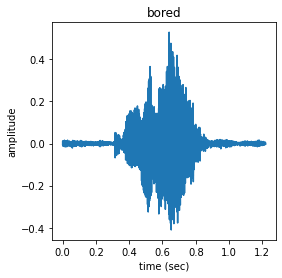

  5%|▌         | 1/20 [00:00<00:03,  6.01it/s]

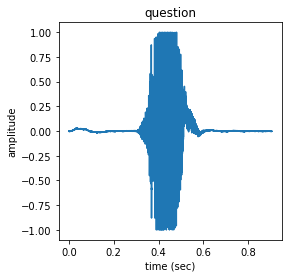

 10%|█         | 2/20 [00:00<00:03,  5.78it/s]

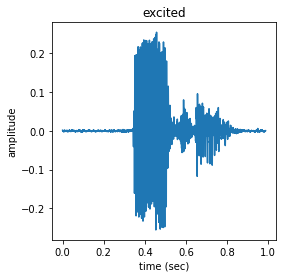

 15%|█▌        | 3/20 [00:00<00:03,  5.61it/s]

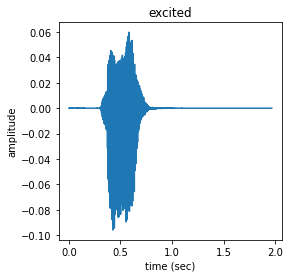

 20%|██        | 4/20 [00:00<00:02,  5.46it/s]

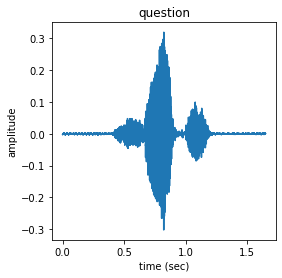

 25%|██▌       | 5/20 [00:00<00:02,  5.44it/s]

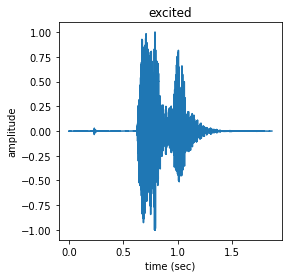

 30%|███       | 6/20 [00:01<00:02,  5.37it/s]

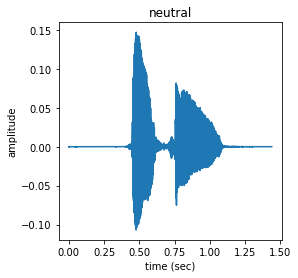

 35%|███▌      | 7/20 [00:01<00:02,  5.05it/s]

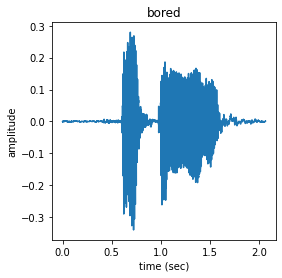

 40%|████      | 8/20 [00:01<00:02,  4.84it/s]

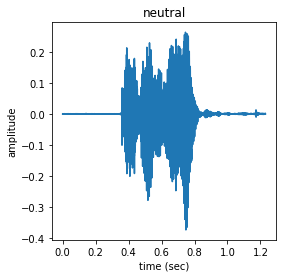

 45%|████▌     | 9/20 [00:01<00:02,  4.76it/s]

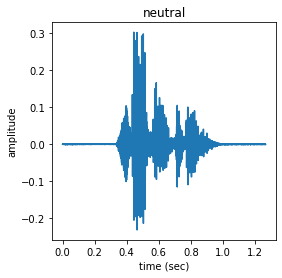

 50%|█████     | 10/20 [00:01<00:01,  5.00it/s]

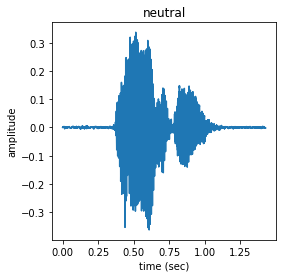

 55%|█████▌    | 11/20 [00:02<00:01,  4.82it/s]

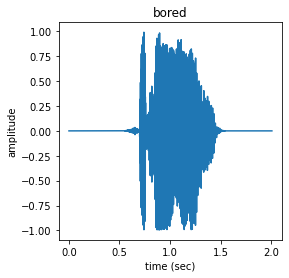

 60%|██████    | 12/20 [00:02<00:01,  4.81it/s]

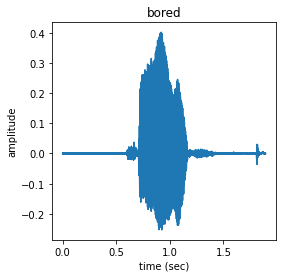

 65%|██████▌   | 13/20 [00:02<00:01,  4.91it/s]

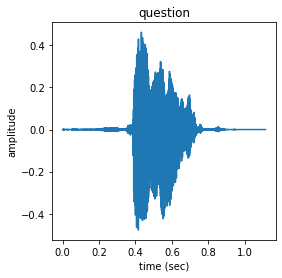

 70%|███████   | 14/20 [00:02<00:01,  4.78it/s]

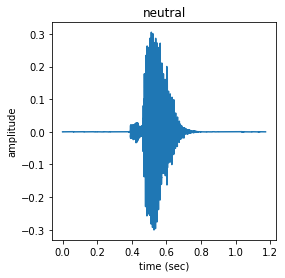

 75%|███████▌  | 15/20 [00:03<00:01,  4.58it/s]

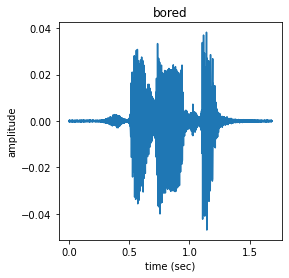

 80%|████████  | 16/20 [00:03<00:00,  4.62it/s]

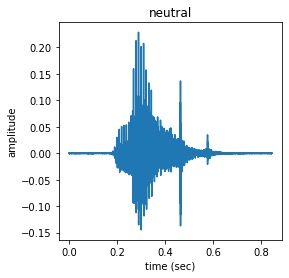

 85%|████████▌ | 17/20 [00:03<00:00,  4.58it/s]

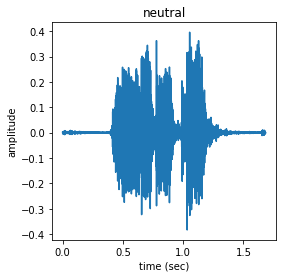

 90%|█████████ | 18/20 [00:03<00:00,  4.56it/s]

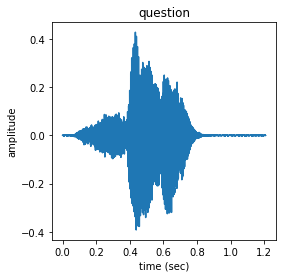

 95%|█████████▌| 19/20 [00:03<00:00,  4.41it/s]

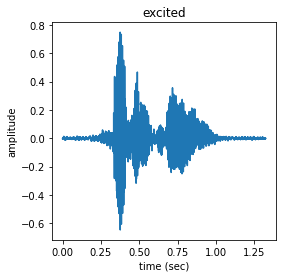

100%|██████████| 20/20 [00:04<00:00,  4.78it/s]


In [ ]:
for i,file in enumerate(tqdm(files[:20])):
  fileID = file.split('/')[-1]
  label = list(labels[labels['File ID']==fileID]['intonation'])[0]
  fig = plt.figure(figsize=(4,4)) 
  fs=None
  x,fs=librosa.load(file,sr=fs) 
  t = np.arange(len(x))/fs
  plt.plot(t,x)
  plt.title(label)
  plt.xlabel('time (sec)')
  plt.ylabel('amplitude')
  plt.show()
  display(ipd.Audio(file))

#####Conclusion for amplitude
* As for bored class, I can consider most of them as bored emotion.Notice the amplitute is pretty high at the begining and keep in a high level till the end.
* As for excited class,I'm not so sure if it'd consider the emotion Exicited. Sounds to me more like neutral. Notice the amplitute is pretty high on the middle data points and the amplitudes at both ends look similar.
* As for neural class,I am sure it'd consider the emotion neural. Notice the amplitute increased constantly and decreased constantly.
* As for question class, I am sure it'd consider the emotion question. Notice the amplitute is pretty high in the middle and decrease at the end.

100%|██████████| 20/20 [00:01<00:00, 15.91it/s]


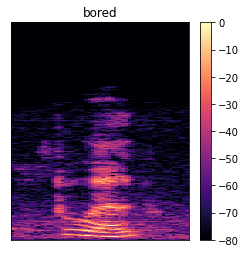

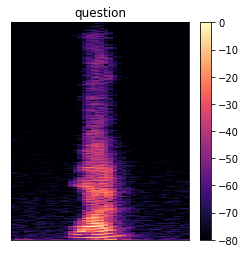

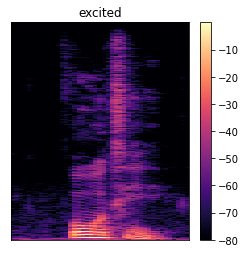

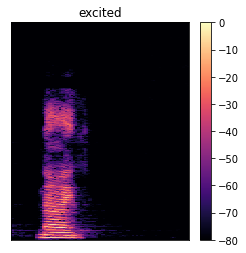

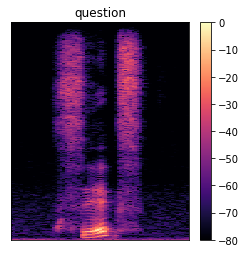

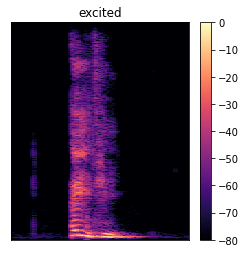

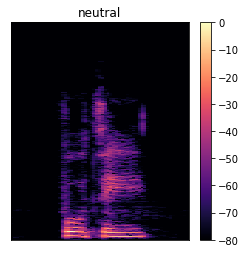

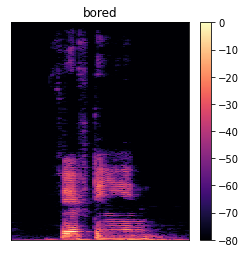

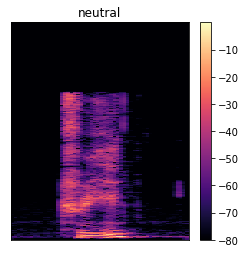

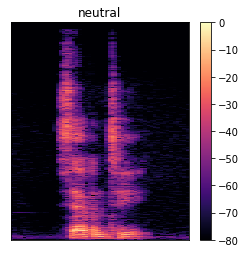

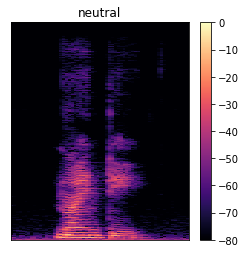

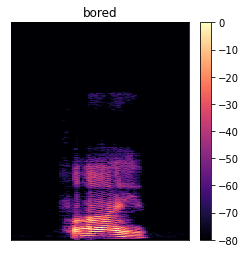

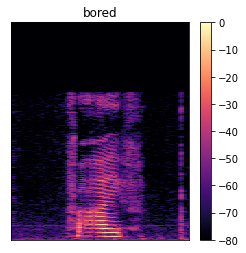

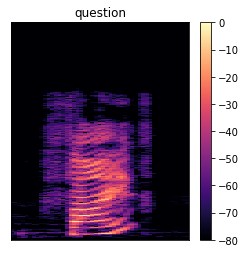

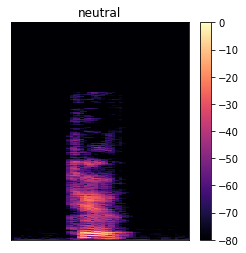

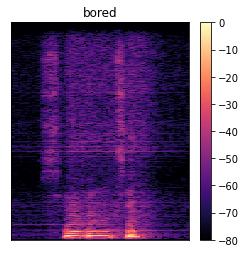

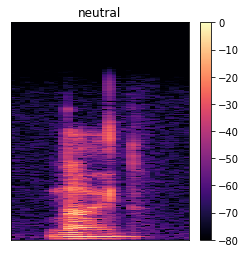

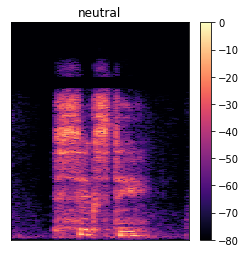

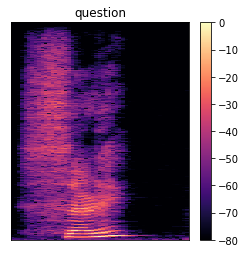

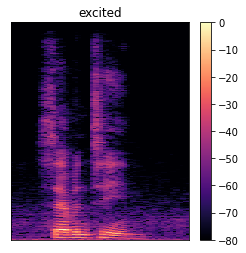

In [ ]:
import librosa.display
for i,file in enumerate(tqdm(files[:20])):
  fileID = file.split('/')[-1]
  label = list(labels[labels['File ID']==fileID]['intonation'])[0]
  fig = plt.figure(figsize=(4,4)) 
  fs=None
  x,fs=librosa.load(file,sr=fs) 
  D=librosa.stft(x)
  S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
  plt.title(label)
  librosa.display.specshow(S_db)
  plt.colorbar()

##### Conclusion for spectrogram:
* It is very hard to find the difference between different intonation and find the similarity between same intonation.

* But it is obvious that the sound frequency of excited emotions is higher than others at the begining

* The sound frequency of bored emotion is consistant then others 

* The sound frequency of question emotion and neural emotion looks same as that of bored emotion


###Part 3.Feature Extraction

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [ ]:
def zero_crossing_rate(x):
    """Computes zero crossing rate of frame"""
    count = len(x)
    count_zero = np.sum(np.abs(np.diff(np.sign(x)))) / 2
    return np.float64(count_zero) / np.float64(count - 1.0)

In [ ]:
def energy(x):#power
    """Computes signal energy of frame"""
    return np.sum(x ** 2) / np.float64(len(x))

In [ ]:
eps = sys.float_info.epsilon
def energy_entropy(x, n_short_blocks=10):
    """Computes entropy of energy"""
    # total frame energy
    x_energy = np.sum(x ** 2)
    x_length = len(x)
    sub_win_len = int(np.floor(x_length / n_short_blocks))
    if x_length != sub_win_len * n_short_blocks:
        x= x[0:sub_win_len * n_short_blocks]

    # sub_wins is of size [n_short_blocks x L]
    sub_wins = x.reshape(sub_win_len, n_short_blocks, order='F').copy()

    # Compute normalized sub-frame energies:
    s = np.sum(sub_wins ** 2, axis=0) / (x_energy + eps)

    # Compute entropy of the normalized sub-frame energies:
    entropy = -np.sum(s * np.log2(s + eps))
    return entropy

In [ ]:
def getXy(files,labels_file,scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    yi = list(labels_file[labels_file['File ID']==fileID]['intonation'])[0]
     
    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)

    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
    
    #Mel-frequency cepstral coefficients (MFCCs)
    mfcc=np.mean(librosa.feature.mfcc(x, fs))

    #root-mean-square (RMS)
    rms=np.mean(librosa.feature.rms(x))
    
    # spectral flatness
    sf=np.mean(librosa.feature.spectral_flatness(x))

    #Zero crossing rate
    zCR=zero_crossing_rate(x)

    #Energy
    power = energy(x)#power = np.sum(x**2)/len(x)

    #Energy entropy
    eEntropy = energy_entropy(x, n_short_blocks=10)
   
    #pitch_mean
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0

    #pitch_std
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0

    #voiced_frequency
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr,zCR,eEntropy,mfcc,rms,sf]
    #xi=[mfcc,sf]
    X.append(xi)
    y.append(yi)
  return np.array(X),np.array(y)

### Part 4. Model Description & Performance Evaluation

####4.1 Get X,y

In [ ]:
#Get X,y
X,y = getXy(files[:10000],labels_file=labels,scale_audio=True, onlySingleDigit=True)

# If you want to use all 20000 files, run next line instead
#X,y = getXy(files,labels_file=labels,scale_audio=True, onlySingleDigit=True)

100%|██████████| 10000/10000 [1:48:15<00:00,  1.54it/s]


In [ ]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
#print('The labels vector is', y)
#print(X)

The shape of X is (10000, 9)
The shape of y is (10000,)


In [ ]:
# If nan sample, remove them
if np.sum(np.isnan(X)):
  idx = np.isnan(X).sum(1)>0
  X = X[~idx]
  y = y[~idx]
print(np.sum(np.isnan(X)))

0


####4.2 Split and Standardize Data 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7000, 9), (3000, 9), (7000,), (3000,))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


####4.3 Model 

#####4.3.1 Model 1-MLPClassifier

In [ ]:
#Model 1
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-03, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.6934285714285714
Validation  Accuracy 0.582


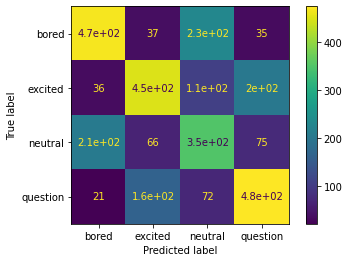

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_val, y_val)  
plt.show()  

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_val, yv_p, average='macro')
precision_recall_fscore_support(y_val, yv_p, average='micro')
precision_recall_fscore_support(y_val, yv_p, average='weighted')

(0.5861570647615193, 0.582, 0.5830985329339171, None)

#####4.3.2 Model 2-Support Vector Machine

In [ ]:
#Model 2
from sklearn import svm
model  = svm.SVC(C=28)
model.fit(X_train,y_train)

SVC(C=28, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.7105714285714285
Validation  Accuracy 0.568


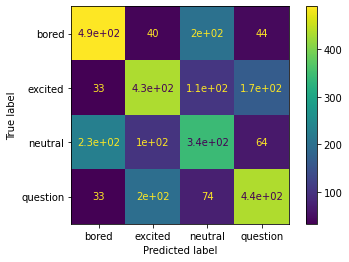

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_val, y_val)  
plt.show()  

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_val, yv_p, average='macro')
precision_recall_fscore_support(y_val, yv_p, average='micro')
precision_recall_fscore_support(y_val, yv_p, average='weighted')

(0.568007330626253, 0.568, 0.5678371239873956, None)

#####4.3.3 Model 3-Gaussian Naive Bayes

In [ ]:
#Model 3
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.498
Validation  Accuracy 0.493


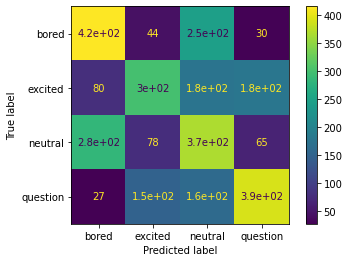

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_val, y_val)  
plt.show()  

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_val, yv_p, average='macro')
precision_recall_fscore_support(y_val, yv_p, average='micro')
precision_recall_fscore_support(y_val, yv_p, average='weighted')

(0.5019245392209033, 0.493, 0.49418599363435717, None)

####4.3.4. Model 4- Convolutional neural network

In [ ]:
#Encoder
labelencoder=preprocessing.LabelEncoder()
y_train=labelencoder.fit_transform(y_train)
y_val=labelencoder.fit_transform(y_val)

In [ ]:
def categorical_classifier():
    model = Sequential()

    # input and first hidden layer
    model.add(Dense(input_shape=(9,), units=256, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.5))

    # second hidden layer
    model.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
    model.add(Dropout(0.5))

    # output layer
    model.add(Dense(units=num_labels, activation='softmax'))

    # compiling our model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    # training the data
    #model.fit(X,y, batch_size=32, epochs=500, validation_split=0.3)
    return model

num_labels=1
model=categorical_classifier()
model.fit(X_train,y_train, batch_size=50, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
140/140 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2449 - val_loss: 0.0000e+00 - val_accuracy: 0.2520
Epoch 2/50
140/140 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2479 - val_loss: 0.0000e+00 - val_accuracy: 0.2520
Epoch 3/50
140/140 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2391 - val_loss: 0.0000e+00 - val_accuracy: 0.2520
Epoch 4/50
140/140 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2577 - val_loss: 0.0000e+00 - val_accuracy: 0.2520
Epoch 5/50
140/140 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2391 - val_loss: 0.0000e+00 - val_accuracy: 0.2520
Epoch 6/50
140/140 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2430 - val_loss: 0.0000e+00 - val_accuracy: 0.2520
Epoch 7/50
140/140 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2

### Part 5.Conclusion



1.   Performance Record:
* **[Conclusion]The Support Vector Machine has the best performance in predicting intonation of audio.**


*   MLPClassifier:
    * Training Accuracy 0.69,Validation Accuracy 0.58
    * Macro,Micro,Weight f score are 0.59, 0.58, 0.58
*   Support Vector Machine:
    * Training Accuracy 0.71,Validation  Accuracy 0.57
    * Macro,Micro,Weight f score are 0.57, 0.57, 0.57
*   Gaussian Naive Bayes:
    * Training Accuracy 0.498,Validation  Accuracy 0.493
    * Macro,Micro,Weight f score are 0.50, 0.49, 0.49
*   Convolution Neural Network:
    * Training Accuracy 0.25,Validation Accuracy 0.25




2.   Problem Statement:
* The difference between different intonations is not obvious enough. 
* Some Participant taking the test have substandard pronunciation
* Some audio contain noises.




# Section2.Advanced Solution
* Prediciting Audio Participant by using Convolution Neural Network



##At the Begining:[Purpose Statement]
In this project, I am focus on  :
* Building a model that predicts the Participant of a short audio segment
* Applying Keras to build,to optimize,and to train model
* Using librosa library to extract features
  * Features are:
    * Mel-frequency cepstral coefficient(MFCCs)
    * Tonnetz
    * Mel-scaled spectrogram 
    * Chromagram from a waveform
  * I got 166 features for each audio files with their respective labels. And I saved them in a csv files because It took a 3hours to extract.
* Result: 
  * The model has 82.19% accuracy on training dataset,and 84.13% accuracy on validation dataset.
  * The performance of model will increase as the number of training dataset increasing.


* *** IMPORTANT ! ***
   * I extracted features and saved them into csv file.I uploaded my features file onto Qmplus that u can use directly in ur PC.
   * *So for Part2.Feature Extraction , I recommended u run my model from (2.5) if u download my feature csv file.That will be much faster than u run from the begining.*

##  Part 0.Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd

import os, sys, re, pickle, glob
import urllib.request
import zipfile

#from IPython.display import Audio
import IPython.display as ipd
from tqdm import tqdm
import librosa

import IPython.display as ipd
import os
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam


import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile

#import soundfile as sf
import os
from PIL import Image
from scipy.fftpack import fft
import os, sys, re, pickle, glob
%matplotlib inline

drive.mount('/content/drive')

Mounted at /content/drive


## Part 1.Data Visualization

#### 1.1.Prepare DataSet

In [ ]:
path = '/content/drive/MyDrive/Data/MLEnd'
os.listdir(path)

['trainingMLEnd.csv',
 'training',
 'Images',
 'training.zip',
 'mfc.csv',
 'chr.csv',
 'me.csv',
 'ton.csv',
 'labels.csv',
 'features2.csv']

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data/MLEnd/trainingMLEnd.csv')
data


File ID  digit_label participant intonation
0      0000000.wav            4         S73   question
1      0000001.wav            2         S88    excited
2      0000002.wav           70          S5    neutral
3      0000003.wav            2         S85      bored
4      0000004.wav            4         S30    excited
...            ...          ...         ...        ...
19995  0019995.wav           90        S163    excited
19996  0019996.wav           10         S99   question
19997  0019997.wav           90         S46   question
19998  0019998.wav           19         S13    neutral
19999  0019999.wav           20        S101    neutral

[20000 rows x 4 columns]

In [ ]:
files = glob.glob('/content/drive/MyDrive/Data/MLEnd/training/*/*.wav')
len(files)


20000

#### 1.2 Plotting

  0%|          | 0/20 [00:00<?, ?it/s]

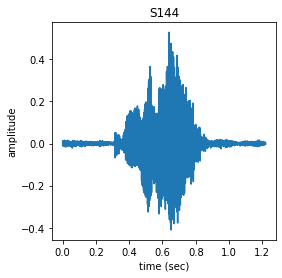

  5%|▌         | 1/20 [00:00<00:03,  5.80it/s]

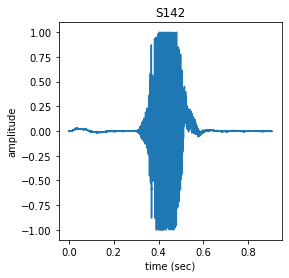

 10%|█         | 2/20 [00:00<00:03,  5.52it/s]

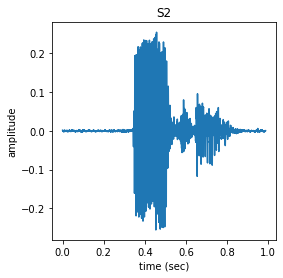

 15%|█▌        | 3/20 [00:00<00:03,  5.43it/s]

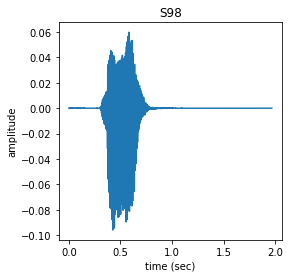

 20%|██        | 4/20 [00:00<00:02,  5.38it/s]

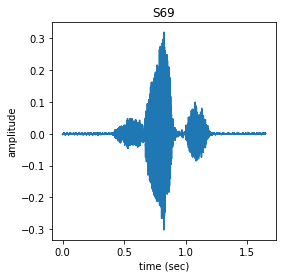

 25%|██▌       | 5/20 [00:00<00:02,  5.12it/s]

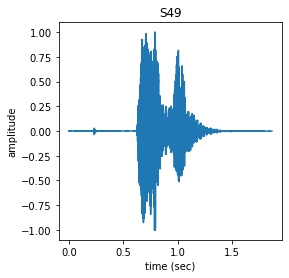

 30%|███       | 6/20 [00:01<00:04,  3.17it/s]

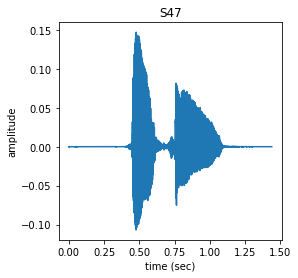

 35%|███▌      | 7/20 [00:01<00:03,  3.61it/s]

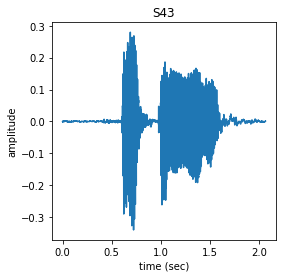

 40%|████      | 8/20 [00:01<00:03,  3.86it/s]

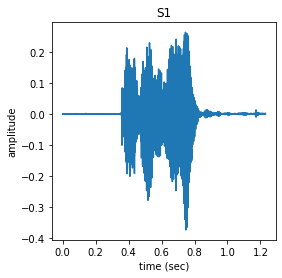

 45%|████▌     | 9/20 [00:02<00:02,  4.08it/s]

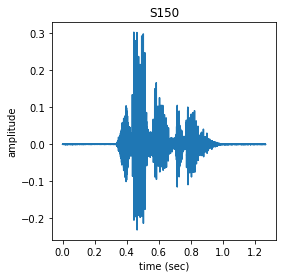

 50%|█████     | 10/20 [00:02<00:02,  4.20it/s]

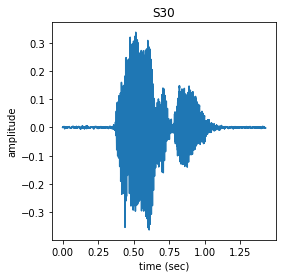

 55%|█████▌    | 11/20 [00:02<00:02,  4.46it/s]

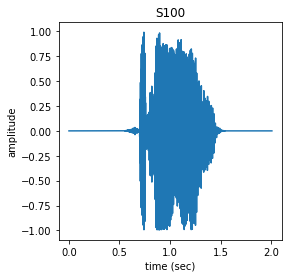

 60%|██████    | 12/20 [00:02<00:01,  4.46it/s]

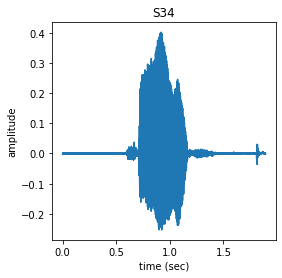

 65%|██████▌   | 13/20 [00:03<00:01,  4.54it/s]

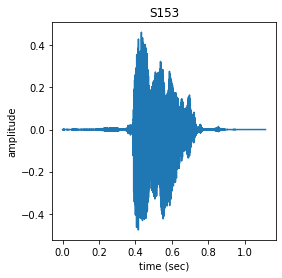

 70%|███████   | 14/20 [00:03<00:01,  4.46it/s]

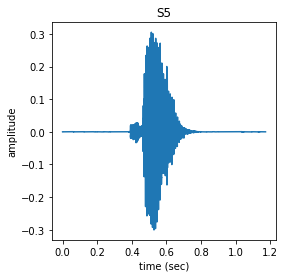

 75%|███████▌  | 15/20 [00:03<00:01,  4.56it/s]

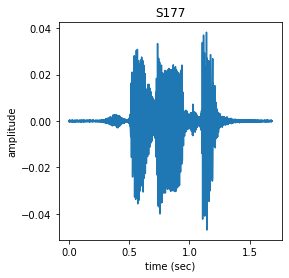

 80%|████████  | 16/20 [00:03<00:00,  4.66it/s]

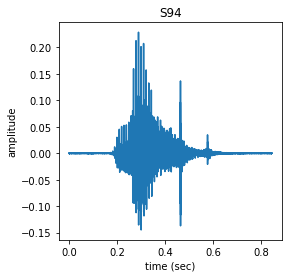

 85%|████████▌ | 17/20 [00:03<00:00,  4.47it/s]

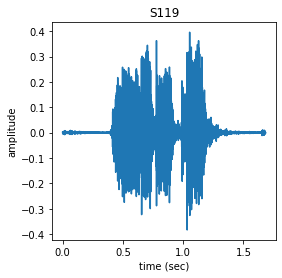

 90%|█████████ | 18/20 [00:04<00:00,  4.41it/s]

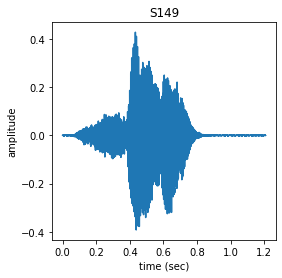

 95%|█████████▌| 19/20 [00:04<00:00,  4.36it/s]

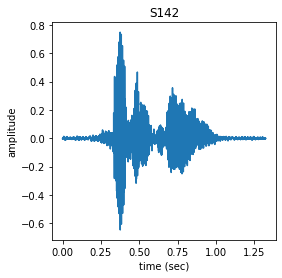

100%|██████████| 20/20 [00:04<00:00,  4.32it/s]


In [ ]:
for i,file in enumerate(tqdm(files[:20])):
  fileID = file.split('/')[-1]
  label = list(data[data['File ID']==fileID]['participant'])[0]
  fig = plt.figure(figsize=(4,4)) 
  fs=None
  x,fs=librosa.load(file,sr=fs) 
  t = np.arange(len(x))/fs
  plt.plot(t,x)
  plt.title(label)
  plt.xlabel('time (sec)')
  plt.ylabel('amplitude')
  plt.show()
  display(ipd.Audio(file))
  

100%|██████████| 20/20 [00:01<00:00, 18.66it/s]


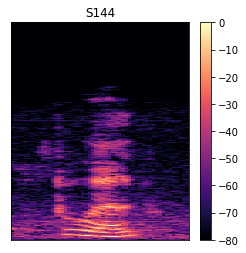

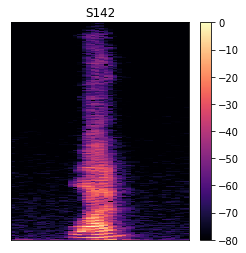

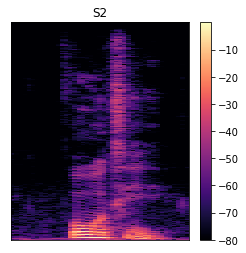

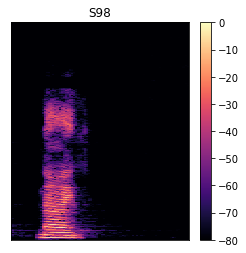

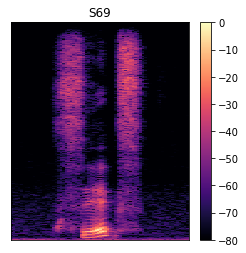

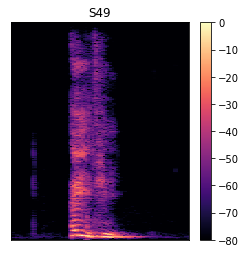

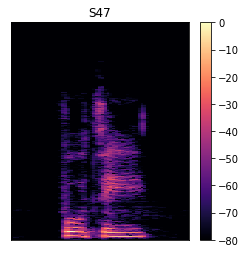

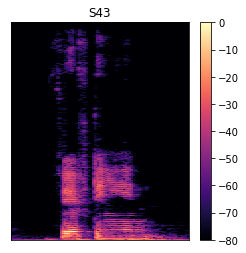

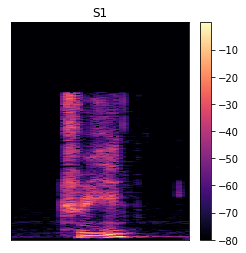

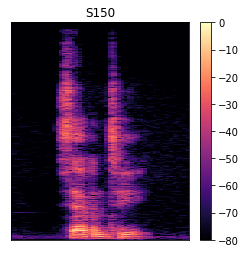

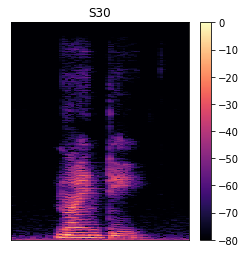

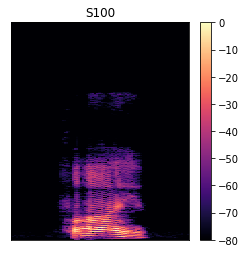

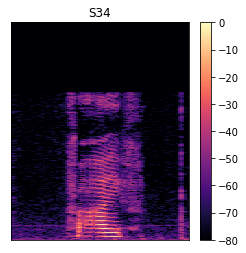

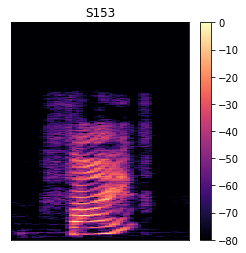

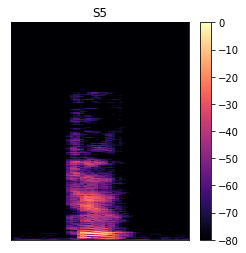

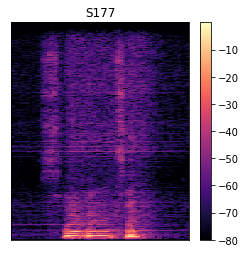

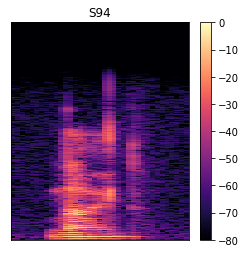

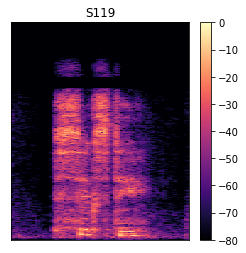

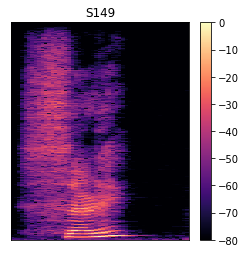

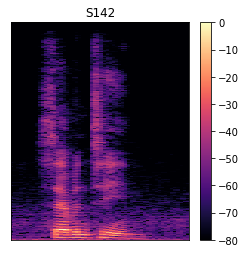

In [ ]:
import librosa.display
for i,file in enumerate(tqdm(files[:20])):
  fileID = file.split('/')[-1]
  label = list(data[data['File ID']==fileID]['participant'])[0]
  fig = plt.figure(figsize=(4,4)) 
  fs=None
  x,fs=librosa.load(file,sr=fs) 
  D=librosa.stft(x)
  S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
  plt.title(label)
  librosa.display.specshow(S_db)
  plt.colorbar()

#####Conclusion
* Here are two S142 audios,but it is obvious they are not created by same person. So this problem will bring some difficulties in training model.And we can deduce not only one label has such problems.
* As u can see from the figure, the audio of different people has different shape.So it will provide a good feature to distinguish participant and train my model. 

## Part 2.Feature Extraction

#### 2.1 Feature Extraction

In [ ]:
mfc=[]#Mel-frequency cepstral coefficient(MFCCs)
chr=[]#Chromagram
me=[]#Mel-scaled spectrogram
ton=[]#Tonnetz
lab=[]#labels
for i in tqdm(range(len(data))):
    f_name='/content/drive/MyDrive/Data/MLEnd/training/Training/'+str(data['File ID'][i])
    X, s_rate = librosa.load(f_name, res_type='kaiser_fast')
    mf = np.mean(librosa.feature.mfcc(y=X, sr=s_rate).T,axis=0)
    mfc.append(mf)
    l=data.participant[i]
    lab.append(l)
    try:
        t = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
        sr=s_rate).T,axis=0)
        ton.append(t)
    except:
        print(f_name)  
    m = np.mean(librosa.feature.melspectrogram(X, sr=s_rate).T,axis=0)
    me.append(m)
    s = np.abs(librosa.stft(X))
    c = np.mean(librosa.feature.chroma_stft(S=s, sr=s_rate).T,axis=0)
    chr.append(c)

#### 2.2 Save Features into Seperate CSV file

In [ ]:
mfcc = pd.DataFrame(mfc)
mfcc.to_csv('/content/drive/MyDrive/Data/MLEnd/mfc.csv', index=False)
chrr = pd.DataFrame(chr)
chrr.to_csv('/content/drive/MyDrive/Data/MLEnd/chr.csv', index=False)
mee = pd.DataFrame(me)
mee.to_csv('/content/drive/MyDrive/Data/MLEnd/me.csv', index=False)
tonn = pd.DataFrame(ton)
tonn.to_csv('/content/drive/MyDrive/Data/MLEnd/ton.csv', index=False)
la = pd.DataFrame(lab)
la.to_csv('/content/drive/MyDrive/Data/MLEnd/labels.csv', index=False)


####2.3 Concatenating Each Feature into One

In [ ]:
# Concatenating each feature into one
features = []
for i in range(len(ton)):
    features.append(np.concatenate((me[i], mfc[i], 
                ton[i], chr[i]), axis=0))

#### 2.4 Saving Features into One Csv File

In [ ]:
# Saving the feature
fea = pd.DataFrame(features)
fea.to_csv('/content/drive/MyDrive/Data/MLEnd/features2.csv', index=False)

#### 2.5 Checking the Shape of Features and Labels

In [ ]:
'''
I uploaded my feature file into Qmplus, if u download ,then u can run this code directly.
fea=pd.read_csv('/content/drive/MyDrive/Data/MLEnd/features2.csv')
lab=pd.read_csv('/content/drive/MyDrive/Data/MLEnd/labels.csv')
'''

In [ ]:
fea.shape

(20000, 166)

####2.6 Convert categorical variables into dummies

In [ ]:
# Encoding
la = pd.get_dummies(lab)
la.shape

(20000, 184)

In [ ]:
target = la.to_numpy()
target

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
target.shape

(20000, 184)

## Part 3.Model Preparation

#### 3.1 Standardize Data

In [ ]:
# normalize the features
tran = StandardScaler()
features_train = tran.fit_transform(fea)

#### 3.2 Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(features_train,target,test_size=0.3)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((14000, 166), (6000, 166), (14000, 184), (6000, 184))

#### 3.3 Build Model

In [ ]:
# Model

model = Sequential()

model.add(Dense(166, input_shape=(166,), activation = 'relu'))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(184, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

## Part 4.Training Result 

#### 4.1 Training Result

In [ ]:
history = model.fit(X_train, y_train, batch_size=50, epochs=80,validation_data=(X_val, y_val))

Epoch 1/80
280/280 [==============================] - 2s 5ms/step - loss: 0.7791 - accuracy: 0.7632 - val_loss: 0.6565 - val_accuracy: 0.8260
Epoch 2/80
280/280 [==============================] - 1s 4ms/step - loss: 0.8303 - accuracy: 0.7506 - val_loss: 0.6902 - val_accuracy: 0.8230
Epoch 3/80
280/280 [==============================] - 1s 4ms/step - loss: 0.8286 - accuracy: 0.7487 - val_loss: 0.6771 - val_accuracy: 0.8250
Epoch 4/80
280/280 [==============================] - 1s 4ms/step - loss: 0.7990 - accuracy: 0.7568 - val_loss: 0.6768 - val_accuracy: 0.8247
Epoch 5/80
280/280 [==============================] - 1s 4ms/step - loss: 0.7821 - accuracy: 0.7591 - val_loss: 0.6784 - val_accuracy: 0.8327
Epoch 6/80
280/280 [==============================] - 1s 4ms/step - loss: 0.7876 - accuracy: 0.7631 - val_loss: 0.6524 - val_accuracy: 0.8310
Epoch 7/80
280/280 [==============================] - 1s 4ms/step - loss: 0.7711 - accuracy: 0.7649 - val_loss: 0.6622 - val_accuracy: 0.8295
Epoch 

#### 4.2 Plotting training result

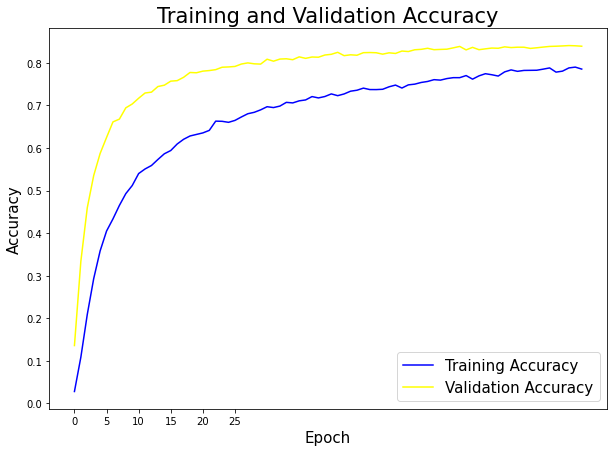

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(10, 7))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='yellow')

# Set title
plt.title('Training and Validation Accuracy', fontsize = 21)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks(range(0,30,5), range(0,30,5));

#### 4.3 Predicting Part(Not executed):Because I don't have testing data

In [ ]:
'''
# To predict the labels of test data
predict = model.predict_classes(test_data)

# To match the labels
prediction=[]
for i in predict:
  j=label_columns[i]
  prediction.append(j)

# Predicted Labels of test data
prediction

'''

## Part 5.Conclusion


 

1.   The performance of model will increase as the number of training data increasing.
2.   The accuracy of training dataset is 78.65%, and the accuracy of validation dataset is 83.88%.
3.   There are some problems in the dataset.
    * The same participant shown on the label is not actually the same participant.
    * The audio difference between participant is not large, so it makes much harder to capture features.
    * It is too time consuming to train a model. I spent 3 hours in capturing all file's feature.Looking forward to finding more efficient way to execute this.
4.  If possible, I wish the time period of coursework can be longer than this time. I want to try different technologies but I don't have enough time . Because it is the final period , I also have other courseworks that need to be finished.
    * eg. I want to convert audio file into image file and then use convolution neural network to train model.
  

